# Comparing Detectors

The purpose of this notebook is to compare the results of tests with specific detectors. We are using PuBe source data for this comparison.

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import lmfit as lf
import matplotlib.pyplot as plt
from scipy.interpolate import InterpolatedUnivariateSpline as interp

In [2]:
#Import data

path = 'data/PuBe/overnightcheckcal/'

det01 = pd.read_csv(path+'det1_check.csv')

#All thresholds are defined to be the same.
thresh = (det01.iloc[:,0] + det01.iloc[:,1])/2
del det01

#Ranges will be stored in order.
ranges = []
for i in range(24):
    try:
        ranges.append(np.asarray(pd.read_csv(path+'det'+str(i)+'_check.csv').iloc[:,2]))
    except FileNotFoundError:
        ranges.append([])

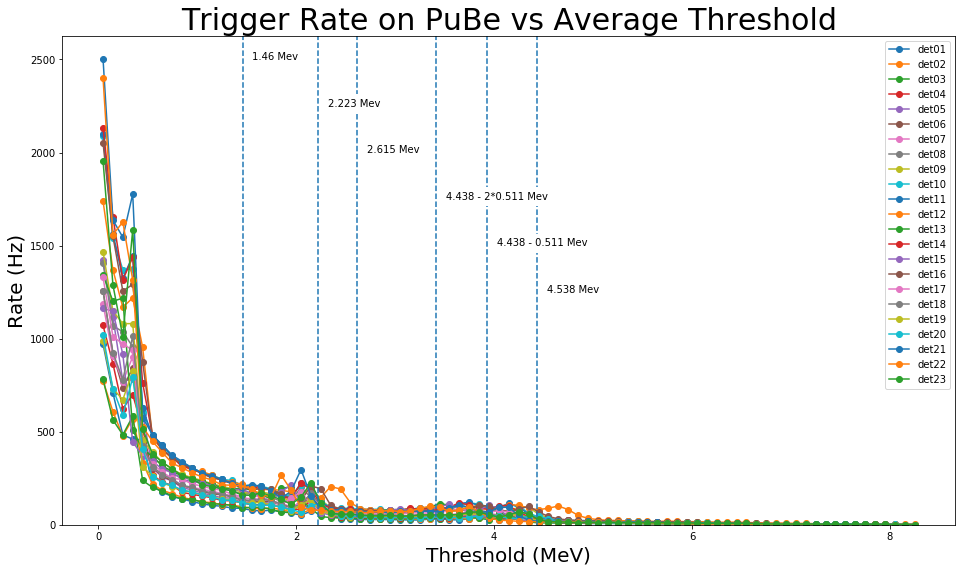

In [3]:
plt.figure(figsize=(16,9))

for i,n in enumerate(ranges):
    if np.asarray(n).size != 0:
        plt.plot(thresh,n,label='det{:02d}'.format(i),marker='o')

plt.xlabel("Threshold (MeV)",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.title("Trigger Rate on PuBe vs Average Threshold",size=30)
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels
#lt.yscale('log')
#plt.xlim(1000)
plt.ylim(0)
plt.axvline(1.46,linestyle='--')
plt.text(1.56,2500,"1.46 Mev",backgroundcolor='w')
plt.axvline(2.223,linestyle='--')
plt.text(2.323,2250,"2.223 Mev",backgroundcolor='w')
plt.axvline(2.615,linestyle='--')
plt.text(2.715,2000,"2.615 Mev",backgroundcolor='w')
plt.axvline(4.438-2*0.511,linestyle='--')
plt.text(4.538-2*0.511,1750,"4.438 - 2*0.511 Mev",backgroundcolor='w')
plt.axvline(4.438-0.511,linestyle='--')
plt.text(4.538-0.511,1500,"4.438 - 0.511 Mev",backgroundcolor='w')
plt.axvline(4.438,linestyle='--')
plt.text(4.538,1250,"4.538 Mev",backgroundcolor='w')

plt.legend()
plt.show()

# Individual Plotting
Pick a number, any number, as long as it's one we have data for.

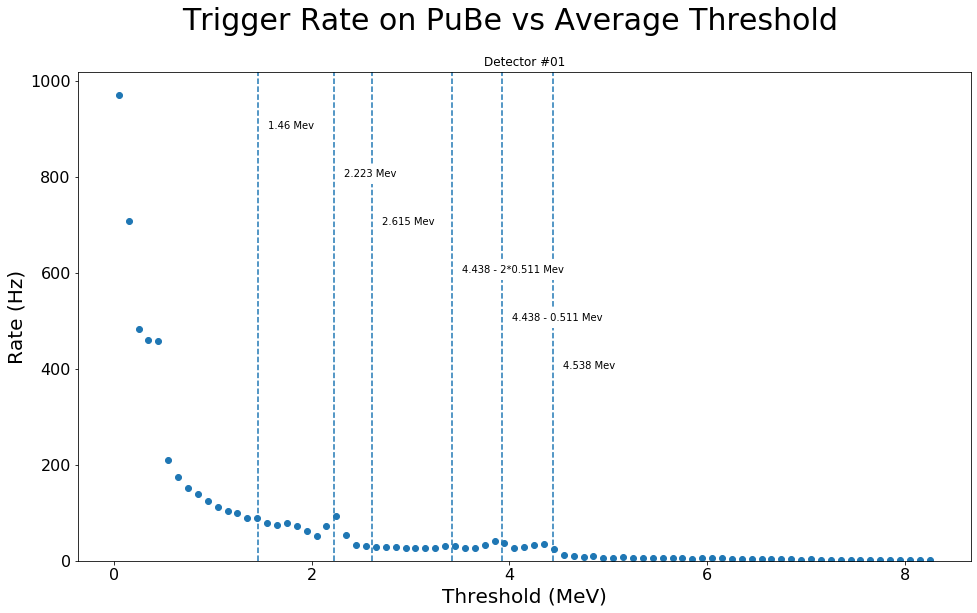

In [4]:
detnum = 1

plt.figure(figsize=(16,9))

plt.scatter(thresh,ranges[detnum],label='det{:02d}'.format(detnum),marker='o')

plt.xlabel("Threshold (MeV)",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.suptitle("Trigger Rate on PuBe vs Average Threshold",size=30)
plt.title("Detector #{:02d}".format(detnum))
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels

#plt.xlim(1000)
plt.ylim(0)

plt.axvline(1.46,linestyle='--')
plt.text(1.56,900,"1.46 Mev",backgroundcolor='w')
plt.axvline(2.223,linestyle='--')
plt.text(2.323,800,"2.223 Mev",backgroundcolor='w')
plt.axvline(2.615,linestyle='--')
plt.text(2.715,700,"2.615 Mev",backgroundcolor='w')
plt.axvline(4.438-2*0.511,linestyle='--')
plt.text(4.538-2*0.511,600,"4.438 - 2*0.511 Mev",backgroundcolor='w')
plt.axvline(4.438-0.511,linestyle='--')
plt.text(4.538-0.511,500,"4.438 - 0.511 Mev",backgroundcolor='w')
plt.axvline(4.438,linestyle='--')
plt.text(4.538,400,"4.538 Mev",backgroundcolor='w')

plt.show()

# Calibration

Now here's the long section, where we calibrate every detector one by one.

## Plotting the calibration lines

In [5]:
#set up some empty arrays to fill later
#each contains an empty array to start counting from 1 instead of 0.
bins = [[]]
energies = [[]]

def gaussian(x,a,m,s):
    return a*np.exp(-(x-m)**2/(2*s**2))

gauss_mod = lf.Model(gaussian)
gauss_params = gauss_mod.make_params()
gauss_params.add('s',value=1,min=0)

fine = np.linspace(min(thresh),max(thresh),1000)

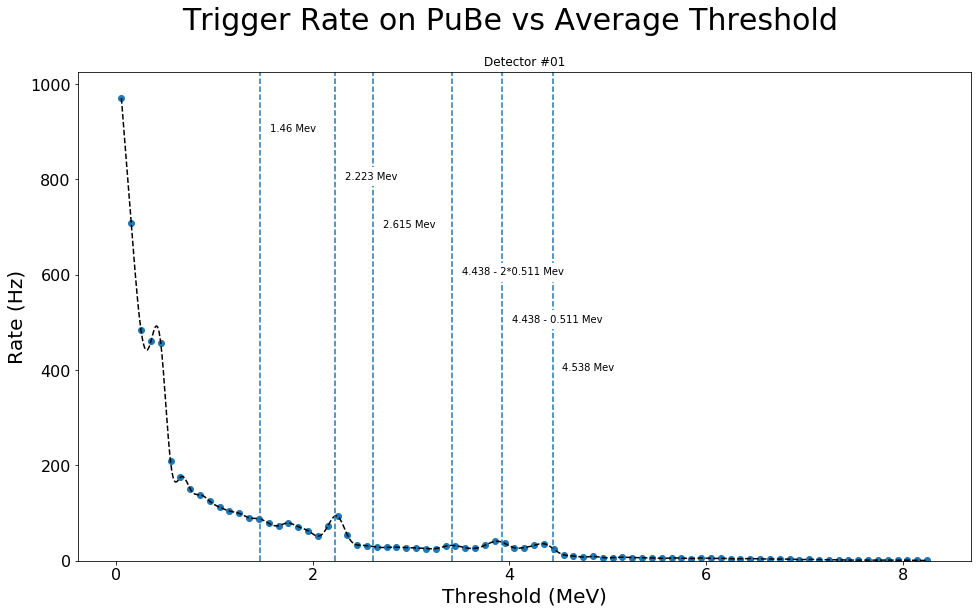

In [6]:
detnum = 1

plt.figure(figsize=(16,9))

interpolated = interp(thresh,ranges[detnum],k=5)
interpolatey = interpolated(fine)

plt.plot(fine,interpolatey,linestyle='--',color='k')
plt.scatter(thresh,ranges[detnum],label='det{:02d}'.format(detnum),marker='o')

plt.xlabel("Threshold (MeV)",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.suptitle("Trigger Rate on PuBe vs Average Threshold",size=30)
plt.title("Detector #{:02d}".format(detnum))
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels

#plt.xlim(1000)
plt.ylim(0)

plt.axvline(1.46,linestyle='--')
plt.text(1.56,900,"1.46 Mev",backgroundcolor='w')
plt.axvline(2.223,linestyle='--')
plt.text(2.323,800,"2.223 Mev",backgroundcolor='w')
plt.axvline(2.615,linestyle='--')
plt.text(2.715,700,"2.615 Mev",backgroundcolor='w')
plt.axvline(4.438-2*0.511,linestyle='--')
plt.text(4.538-2*0.511,600,"4.438 - 2*0.511 Mev",backgroundcolor='w')
plt.axvline(4.438-0.511,linestyle='--')
plt.text(4.538-0.511,500,"4.438 - 0.511 Mev",backgroundcolor='w')
plt.axvline(4.438,linestyle='--')
plt.text(4.538,400,"4.538 Mev",backgroundcolor='w')

plt.show()

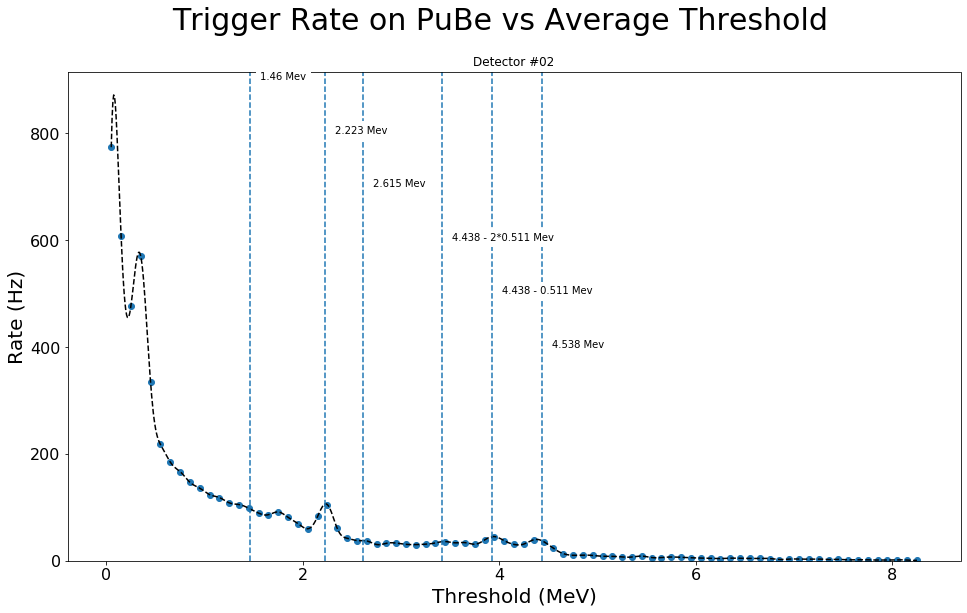

In [7]:
detnum = 2

plt.figure(figsize=(16,9))

interpolated = interp(thresh,ranges[detnum],k=5)
interpolatey = interpolated(fine)

plt.plot(fine,interpolatey,linestyle='--',color='k')
plt.scatter(thresh,ranges[detnum],label='det{:02d}'.format(detnum),marker='o')

plt.xlabel("Threshold (MeV)",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.suptitle("Trigger Rate on PuBe vs Average Threshold",size=30)
plt.title("Detector #{:02d}".format(detnum))
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels

#plt.xlim(1000)
plt.ylim(0)

plt.axvline(1.46,linestyle='--')
plt.text(1.56,900,"1.46 Mev",backgroundcolor='w')
plt.axvline(2.223,linestyle='--')
plt.text(2.323,800,"2.223 Mev",backgroundcolor='w')
plt.axvline(2.615,linestyle='--')
plt.text(2.715,700,"2.615 Mev",backgroundcolor='w')
plt.axvline(4.438-2*0.511,linestyle='--')
plt.text(4.538-2*0.511,600,"4.438 - 2*0.511 Mev",backgroundcolor='w')
plt.axvline(4.438-0.511,linestyle='--')
plt.text(4.538-0.511,500,"4.438 - 0.511 Mev",backgroundcolor='w')
plt.axvline(4.438,linestyle='--')
plt.text(4.538,400,"4.538 Mev",backgroundcolor='w')

plt.show()

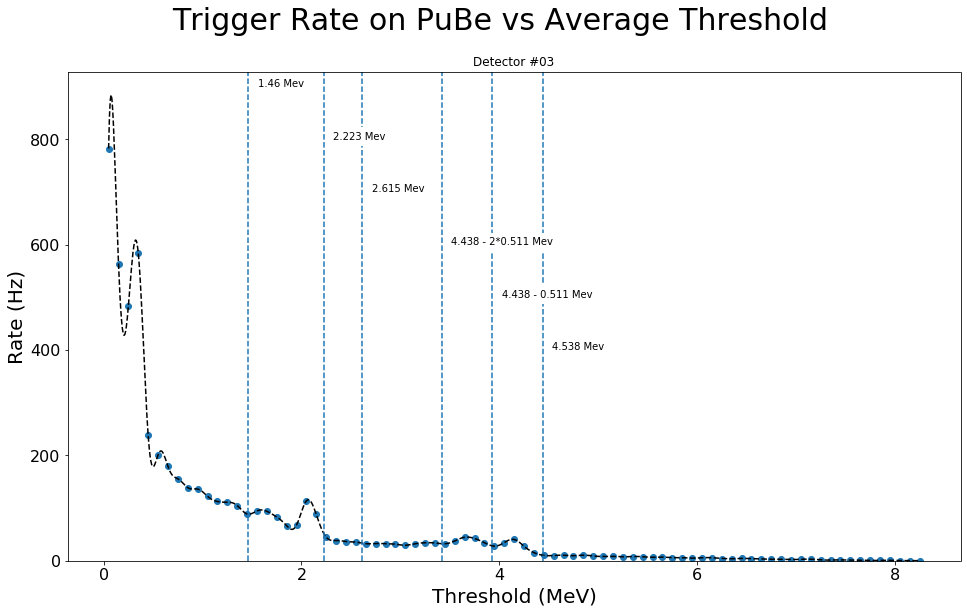

In [8]:
detnum = 3

plt.figure(figsize=(16,9))

plt.scatter(thresh,ranges[detnum],label='det{:02d}'.format(detnum),marker='o')

interpolated = interp(thresh,ranges[detnum],k=5)
interpolatey = interpolated(fine)

plt.plot(fine,interpolatey,linestyle='--',color='k')
plt.xlabel("Threshold (MeV)",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.suptitle("Trigger Rate on PuBe vs Average Threshold",size=30)
plt.title("Detector #{:02d}".format(detnum))
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels

#plt.xlim(1000)
plt.ylim(0)

plt.axvline(1.46,linestyle='--')
plt.text(1.56,900,"1.46 Mev",backgroundcolor='w')
plt.axvline(2.223,linestyle='--')
plt.text(2.323,800,"2.223 Mev",backgroundcolor='w')
plt.axvline(2.615,linestyle='--')
plt.text(2.715,700,"2.615 Mev",backgroundcolor='w')
plt.axvline(4.438-2*0.511,linestyle='--')
plt.text(4.538-2*0.511,600,"4.438 - 2*0.511 Mev",backgroundcolor='w')
plt.axvline(4.438-0.511,linestyle='--')
plt.text(4.538-0.511,500,"4.438 - 0.511 Mev",backgroundcolor='w')
plt.axvline(4.438,linestyle='--')
plt.text(4.538,400,"4.538 Mev",backgroundcolor='w')

plt.show()

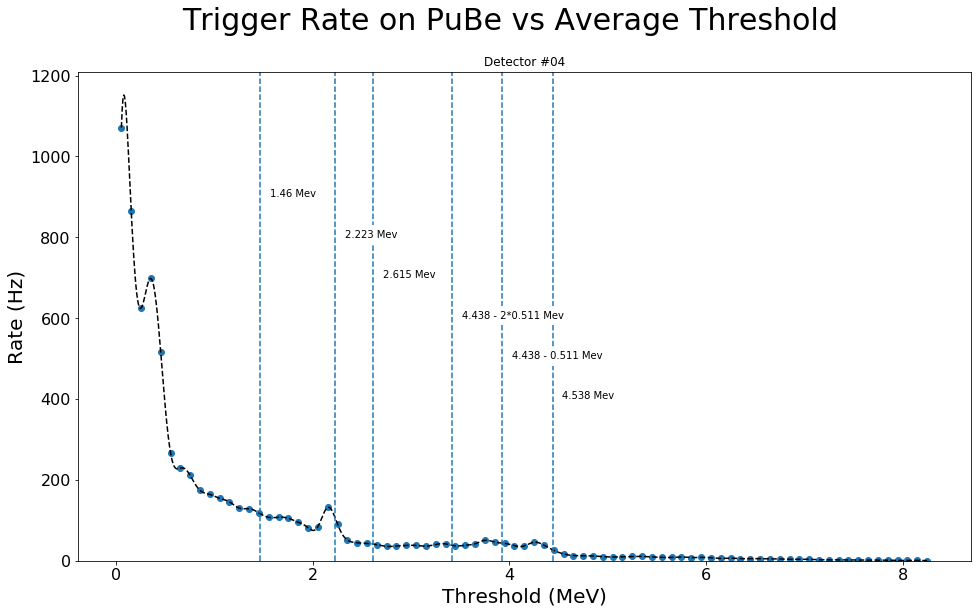

In [9]:
detnum = 4

plt.figure(figsize=(16,9))

interpolated = interp(thresh,ranges[detnum],k=5)
interpolatey = interpolated(fine)

plt.plot(fine,interpolatey,linestyle='--',color='k')
plt.scatter(thresh,ranges[detnum],label='det{:02d}'.format(detnum),marker='o')

plt.xlabel("Threshold (MeV)",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.suptitle("Trigger Rate on PuBe vs Average Threshold",size=30)
plt.title("Detector #{:02d}".format(detnum))
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels

#plt.xlim(1000)
plt.ylim(0)

plt.axvline(1.46,linestyle='--')
plt.text(1.56,900,"1.46 Mev",backgroundcolor='w')
plt.axvline(2.223,linestyle='--')
plt.text(2.323,800,"2.223 Mev",backgroundcolor='w')
plt.axvline(2.615,linestyle='--')
plt.text(2.715,700,"2.615 Mev",backgroundcolor='w')
plt.axvline(4.438-2*0.511,linestyle='--')
plt.text(4.538-2*0.511,600,"4.438 - 2*0.511 Mev",backgroundcolor='w')
plt.axvline(4.438-0.511,linestyle='--')
plt.text(4.538-0.511,500,"4.438 - 0.511 Mev",backgroundcolor='w')
plt.axvline(4.438,linestyle='--')
plt.text(4.538,400,"4.538 Mev",backgroundcolor='w')

plt.show()

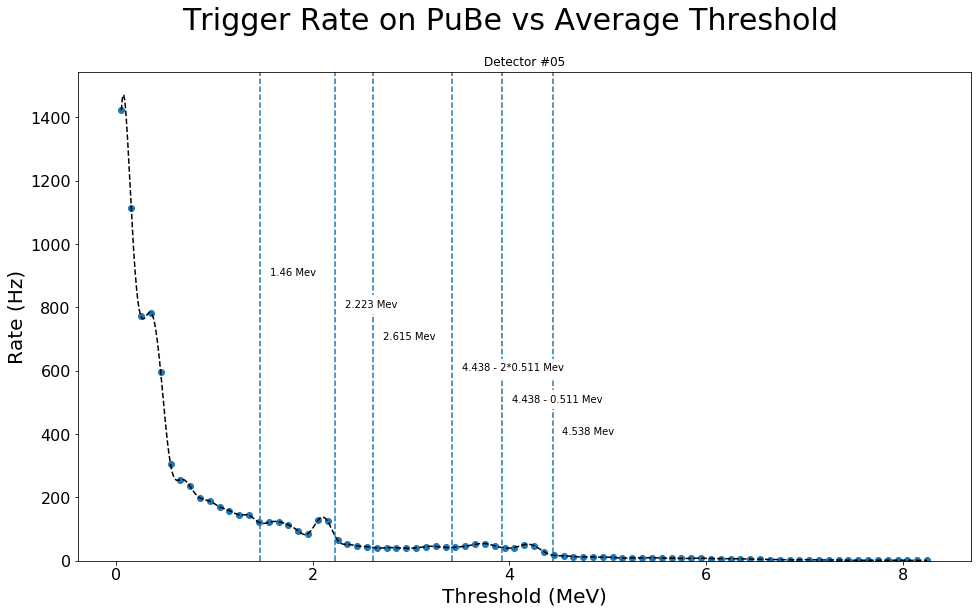

In [10]:
detnum = 5

plt.figure(figsize=(16,9))

interpolated = interp(thresh,ranges[detnum],k=5)
interpolatey = interpolated(fine)

plt.plot(fine,interpolatey,linestyle='--',color='k')
plt.scatter(thresh,ranges[detnum],label='det{:02d}'.format(detnum),marker='o')

plt.xlabel("Threshold (MeV)",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.suptitle("Trigger Rate on PuBe vs Average Threshold",size=30)
plt.title("Detector #{:02d}".format(detnum))
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels

#plt.xlim(1000)
plt.ylim(0)

plt.axvline(1.46,linestyle='--')
plt.text(1.56,900,"1.46 Mev",backgroundcolor='w')
plt.axvline(2.223,linestyle='--')
plt.text(2.323,800,"2.223 Mev",backgroundcolor='w')
plt.axvline(2.615,linestyle='--')
plt.text(2.715,700,"2.615 Mev",backgroundcolor='w')
plt.axvline(4.438-2*0.511,linestyle='--')
plt.text(4.538-2*0.511,600,"4.438 - 2*0.511 Mev",backgroundcolor='w')
plt.axvline(4.438-0.511,linestyle='--')
plt.text(4.538-0.511,500,"4.438 - 0.511 Mev",backgroundcolor='w')
plt.axvline(4.438,linestyle='--')
plt.text(4.538,400,"4.538 Mev",backgroundcolor='w')

plt.show()

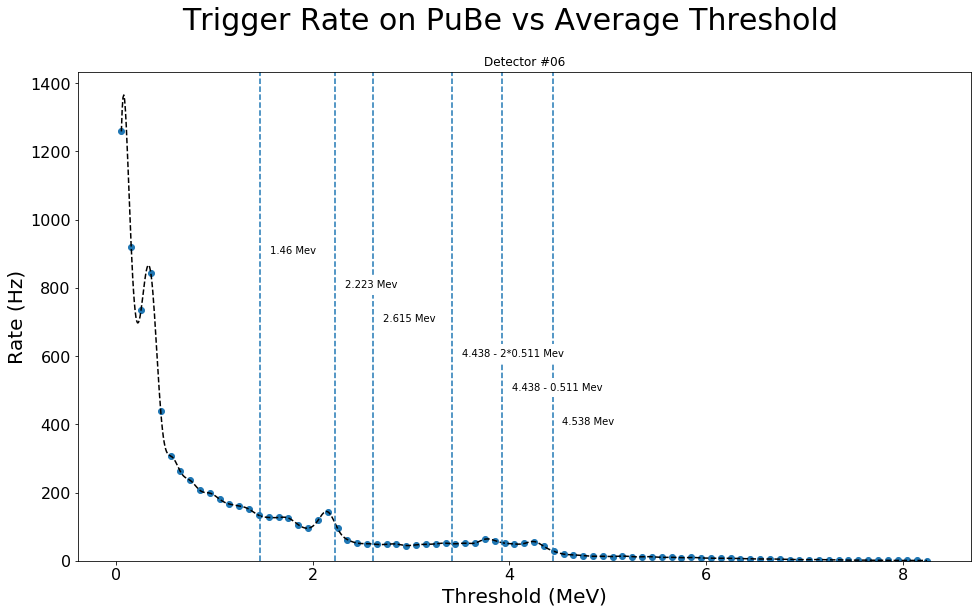

In [11]:
detnum = 6

plt.figure(figsize=(16,9))

interpolated = interp(thresh,ranges[detnum],k=5)
interpolatey = interpolated(fine)

plt.plot(fine,interpolatey,linestyle='--',color='k')
plt.scatter(thresh,ranges[detnum],label='det{:02d}'.format(detnum),marker='o')

plt.xlabel("Threshold (MeV)",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.suptitle("Trigger Rate on PuBe vs Average Threshold",size=30)
plt.title("Detector #{:02d}".format(detnum))
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels

#plt.xlim(1000)
plt.ylim(0)

plt.axvline(1.46,linestyle='--')
plt.text(1.56,900,"1.46 Mev",backgroundcolor='w')
plt.axvline(2.223,linestyle='--')
plt.text(2.323,800,"2.223 Mev",backgroundcolor='w')
plt.axvline(2.615,linestyle='--')
plt.text(2.715,700,"2.615 Mev",backgroundcolor='w')
plt.axvline(4.438-2*0.511,linestyle='--')
plt.text(4.538-2*0.511,600,"4.438 - 2*0.511 Mev",backgroundcolor='w')
plt.axvline(4.438-0.511,linestyle='--')
plt.text(4.538-0.511,500,"4.438 - 0.511 Mev",backgroundcolor='w')
plt.axvline(4.438,linestyle='--')
plt.text(4.538,400,"4.538 Mev",backgroundcolor='w')

plt.show()

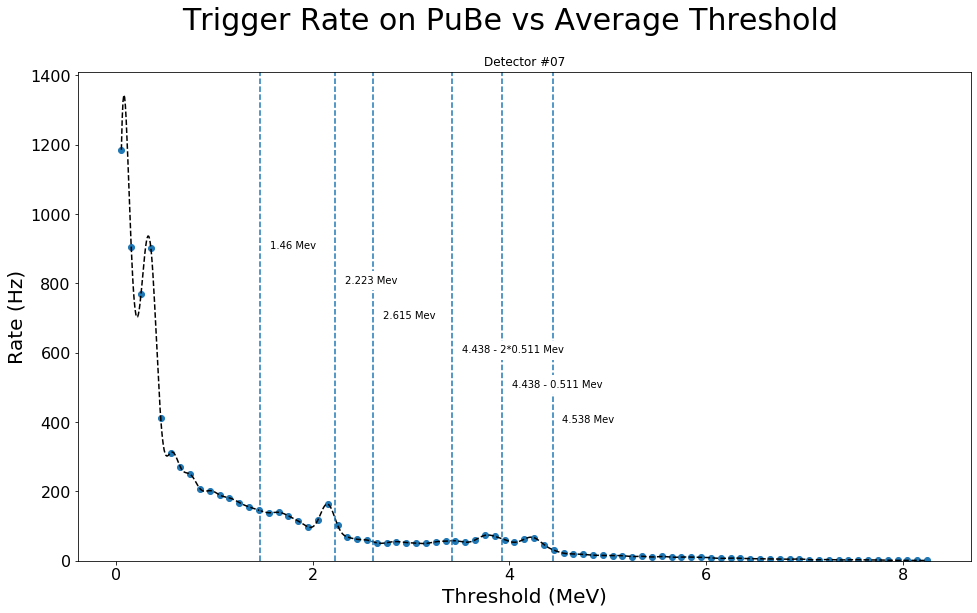

In [12]:
detnum = 7

plt.figure(figsize=(16,9))

interpolated = interp(thresh,ranges[detnum],k=5)
interpolatey = interpolated(fine)

plt.plot(fine,interpolatey,linestyle='--',color='k')
plt.scatter(thresh,ranges[detnum],label='det{:02d}'.format(detnum),marker='o')

plt.xlabel("Threshold (MeV)",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.suptitle("Trigger Rate on PuBe vs Average Threshold",size=30)
plt.title("Detector #{:02d}".format(detnum))
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels

#plt.xlim(1000)
plt.ylim(0)

plt.axvline(1.46,linestyle='--')
plt.text(1.56,900,"1.46 Mev",backgroundcolor='w')
plt.axvline(2.223,linestyle='--')
plt.text(2.323,800,"2.223 Mev",backgroundcolor='w')
plt.axvline(2.615,linestyle='--')
plt.text(2.715,700,"2.615 Mev",backgroundcolor='w')
plt.axvline(4.438-2*0.511,linestyle='--')
plt.text(4.538-2*0.511,600,"4.438 - 2*0.511 Mev",backgroundcolor='w')
plt.axvline(4.438-0.511,linestyle='--')
plt.text(4.538-0.511,500,"4.438 - 0.511 Mev",backgroundcolor='w')
plt.axvline(4.438,linestyle='--')
plt.text(4.538,400,"4.538 Mev",backgroundcolor='w')

plt.show()

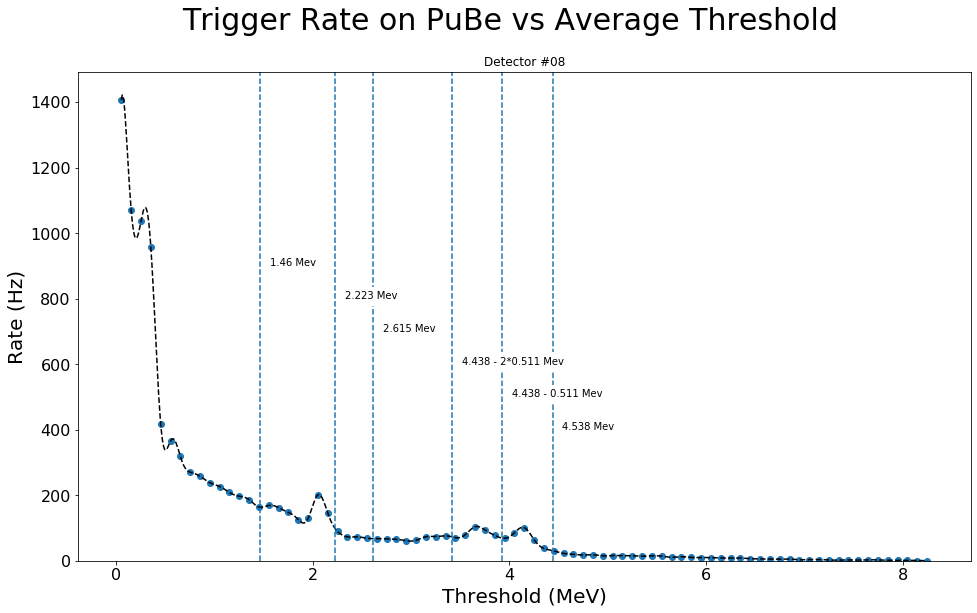

In [13]:
detnum = 8

plt.figure(figsize=(16,9))

interpolated = interp(thresh,ranges[detnum],k=5)
interpolatey = interpolated(fine)

plt.plot(fine,interpolatey,linestyle='--',color='k')
plt.scatter(thresh,ranges[detnum],label='det{:02d}'.format(detnum),marker='o')

plt.xlabel("Threshold (MeV)",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.suptitle("Trigger Rate on PuBe vs Average Threshold",size=30)
plt.title("Detector #{:02d}".format(detnum))
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels

#plt.xlim(1000)
plt.ylim(0)

plt.axvline(1.46,linestyle='--')
plt.text(1.56,900,"1.46 Mev",backgroundcolor='w')
plt.axvline(2.223,linestyle='--')
plt.text(2.323,800,"2.223 Mev",backgroundcolor='w')
plt.axvline(2.615,linestyle='--')
plt.text(2.715,700,"2.615 Mev",backgroundcolor='w')
plt.axvline(4.438-2*0.511,linestyle='--')
plt.text(4.538-2*0.511,600,"4.438 - 2*0.511 Mev",backgroundcolor='w')
plt.axvline(4.438-0.511,linestyle='--')
plt.text(4.538-0.511,500,"4.438 - 0.511 Mev",backgroundcolor='w')
plt.axvline(4.438,linestyle='--')
plt.text(4.538,400,"4.538 Mev",backgroundcolor='w')

plt.show()

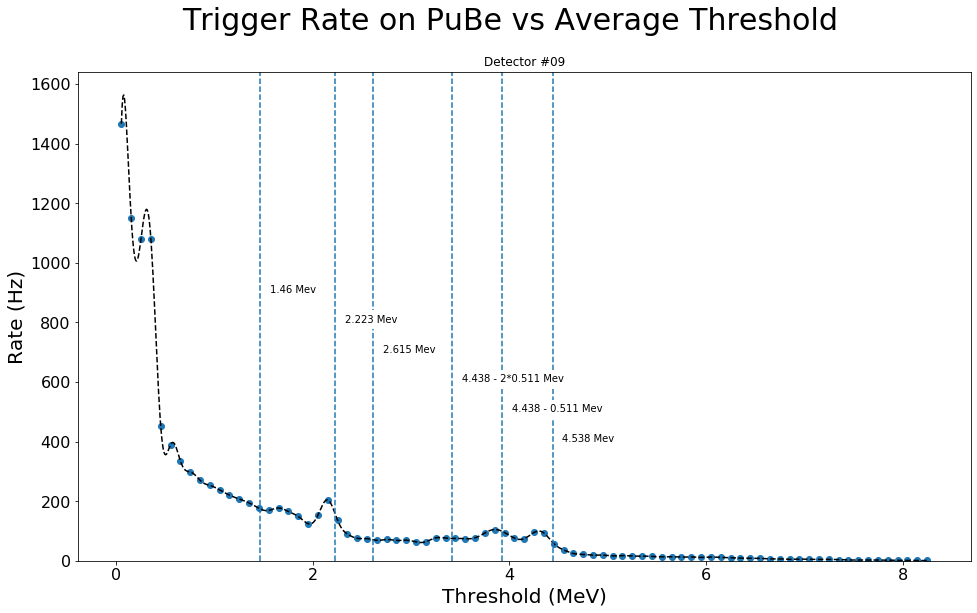

In [14]:
detnum = 9

plt.figure(figsize=(16,9))

interpolated = interp(thresh,ranges[detnum],k=5)
interpolatey = interpolated(fine)

plt.plot(fine,interpolatey,linestyle='--',color='k')
plt.scatter(thresh,ranges[detnum],label='det{:02d}'.format(detnum),marker='o')

plt.xlabel("Threshold (MeV)",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.suptitle("Trigger Rate on PuBe vs Average Threshold",size=30)
plt.title("Detector #{:02d}".format(detnum))
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels

#plt.xlim(1000)
plt.ylim(0)

plt.axvline(1.46,linestyle='--')
plt.text(1.56,900,"1.46 Mev",backgroundcolor='w')
plt.axvline(2.223,linestyle='--')
plt.text(2.323,800,"2.223 Mev",backgroundcolor='w')
plt.axvline(2.615,linestyle='--')
plt.text(2.715,700,"2.615 Mev",backgroundcolor='w')
plt.axvline(4.438-2*0.511,linestyle='--')
plt.text(4.538-2*0.511,600,"4.438 - 2*0.511 Mev",backgroundcolor='w')
plt.axvline(4.438-0.511,linestyle='--')
plt.text(4.538-0.511,500,"4.438 - 0.511 Mev",backgroundcolor='w')
plt.axvline(4.438,linestyle='--')
plt.text(4.538,400,"4.538 Mev",backgroundcolor='w')

plt.show()

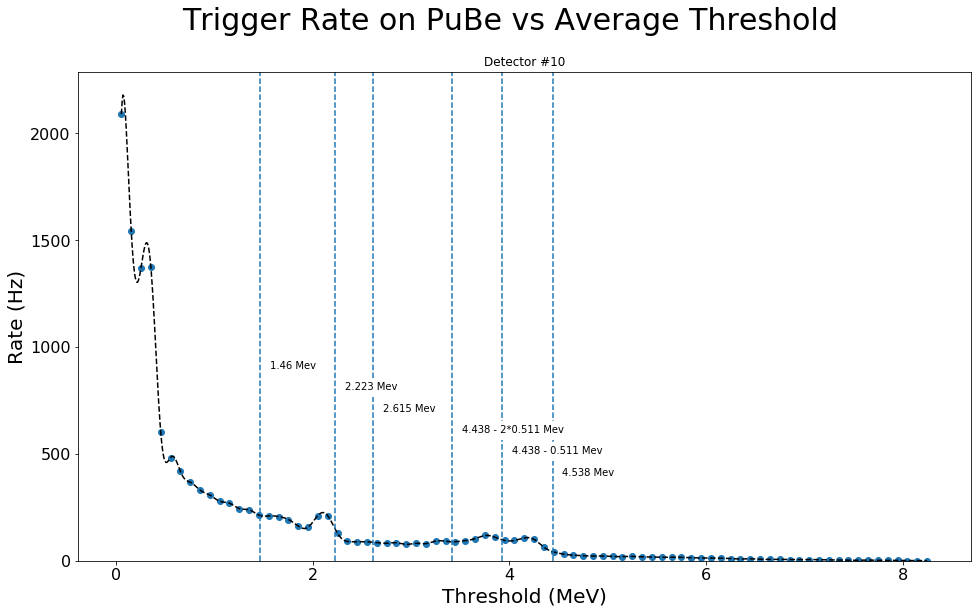

In [15]:
detnum = 10

plt.figure(figsize=(16,9))

interpolated = interp(thresh,ranges[detnum],k=5)
interpolatey = interpolated(fine)

plt.plot(fine,interpolatey,linestyle='--',color='k')
plt.scatter(thresh,ranges[detnum],label='det{:02d}'.format(detnum),marker='o')

plt.xlabel("Threshold (MeV)",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.suptitle("Trigger Rate on PuBe vs Average Threshold",size=30)
plt.title("Detector #{:02d}".format(detnum))
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels

#plt.xlim(1000)
plt.ylim(0)

plt.axvline(1.46,linestyle='--')
plt.text(1.56,900,"1.46 Mev",backgroundcolor='w')
plt.axvline(2.223,linestyle='--')
plt.text(2.323,800,"2.223 Mev",backgroundcolor='w')
plt.axvline(2.615,linestyle='--')
plt.text(2.715,700,"2.615 Mev",backgroundcolor='w')
plt.axvline(4.438-2*0.511,linestyle='--')
plt.text(4.538-2*0.511,600,"4.438 - 2*0.511 Mev",backgroundcolor='w')
plt.axvline(4.438-0.511,linestyle='--')
plt.text(4.538-0.511,500,"4.438 - 0.511 Mev",backgroundcolor='w')
plt.axvline(4.438,linestyle='--')
plt.text(4.538,400,"4.538 Mev",backgroundcolor='w')

plt.show()

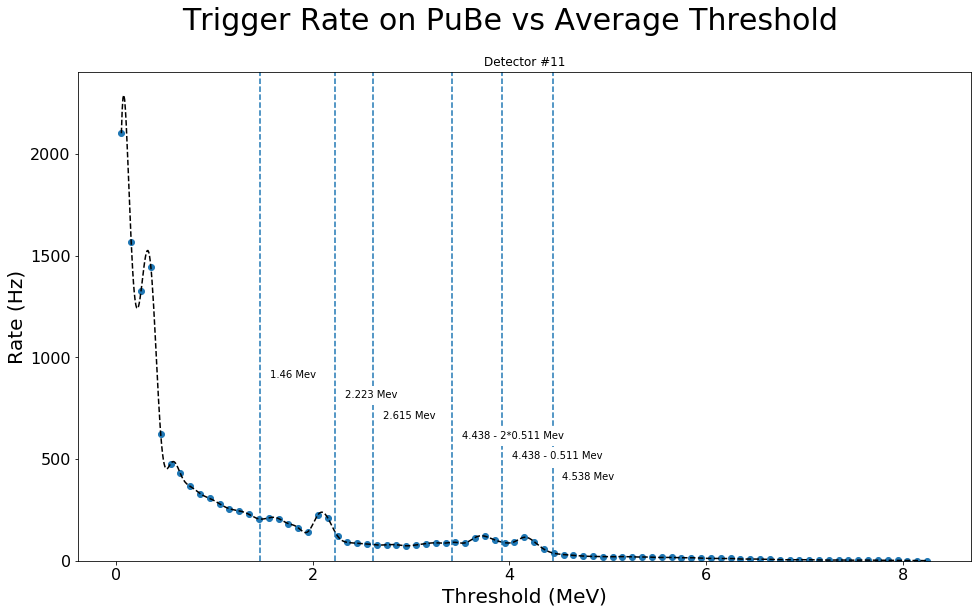

In [16]:
detnum = 11

plt.figure(figsize=(16,9))

interpolated = interp(thresh,ranges[detnum],k=5)
interpolatey = interpolated(fine)

plt.plot(fine,interpolatey,linestyle='--',color='k')
plt.scatter(thresh,ranges[detnum],label='det{:02d}'.format(detnum),marker='o')

plt.xlabel("Threshold (MeV)",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.suptitle("Trigger Rate on PuBe vs Average Threshold",size=30)
plt.title("Detector #{:02d}".format(detnum))
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels

#plt.xlim(1000)
plt.ylim(0)

plt.axvline(1.46,linestyle='--')
plt.text(1.56,900,"1.46 Mev",backgroundcolor='w')
plt.axvline(2.223,linestyle='--')
plt.text(2.323,800,"2.223 Mev",backgroundcolor='w')
plt.axvline(2.615,linestyle='--')
plt.text(2.715,700,"2.615 Mev",backgroundcolor='w')
plt.axvline(4.438-2*0.511,linestyle='--')
plt.text(4.538-2*0.511,600,"4.438 - 2*0.511 Mev",backgroundcolor='w')
plt.axvline(4.438-0.511,linestyle='--')
plt.text(4.538-0.511,500,"4.438 - 0.511 Mev",backgroundcolor='w')
plt.axvline(4.438,linestyle='--')
plt.text(4.538,400,"4.538 Mev",backgroundcolor='w')

plt.show()

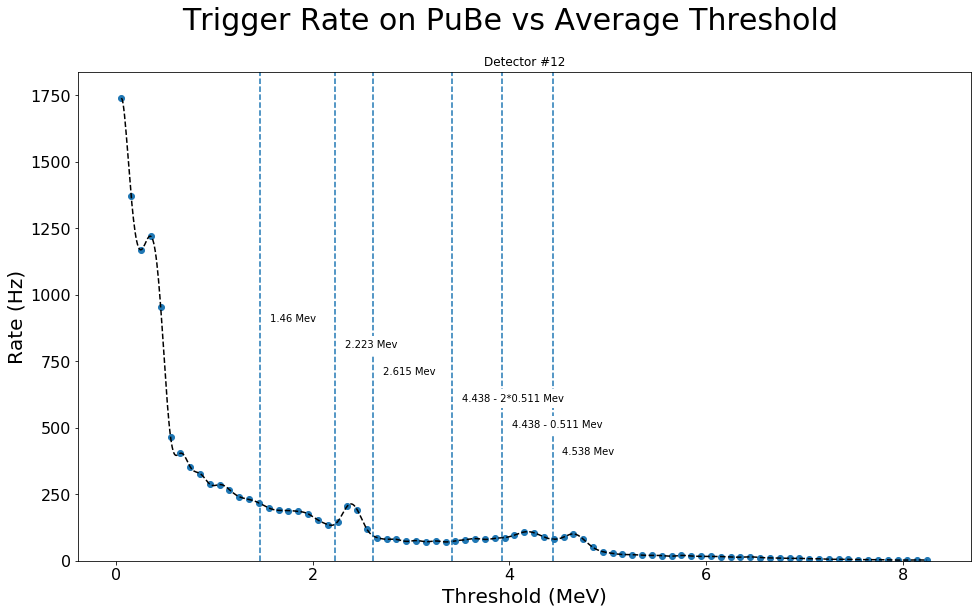

In [17]:
detnum = 12

plt.figure(figsize=(16,9))

interpolated = interp(thresh,ranges[detnum],k=5)
interpolatey = interpolated(fine)

plt.plot(fine,interpolatey,linestyle='--',color='k')
plt.scatter(thresh,ranges[detnum],label='det{:02d}'.format(detnum),marker='o')

plt.xlabel("Threshold (MeV)",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.suptitle("Trigger Rate on PuBe vs Average Threshold",size=30)
plt.title("Detector #{:02d}".format(detnum))
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels

#plt.xlim(1000)
plt.ylim(0)

plt.axvline(1.46,linestyle='--')
plt.text(1.56,900,"1.46 Mev",backgroundcolor='w')
plt.axvline(2.223,linestyle='--')
plt.text(2.323,800,"2.223 Mev",backgroundcolor='w')
plt.axvline(2.615,linestyle='--')
plt.text(2.715,700,"2.615 Mev",backgroundcolor='w')
plt.axvline(4.438-2*0.511,linestyle='--')
plt.text(4.538-2*0.511,600,"4.438 - 2*0.511 Mev",backgroundcolor='w')
plt.axvline(4.438-0.511,linestyle='--')
plt.text(4.538-0.511,500,"4.438 - 0.511 Mev",backgroundcolor='w')
plt.axvline(4.438,linestyle='--')
plt.text(4.538,400,"4.538 Mev",backgroundcolor='w')

plt.show()

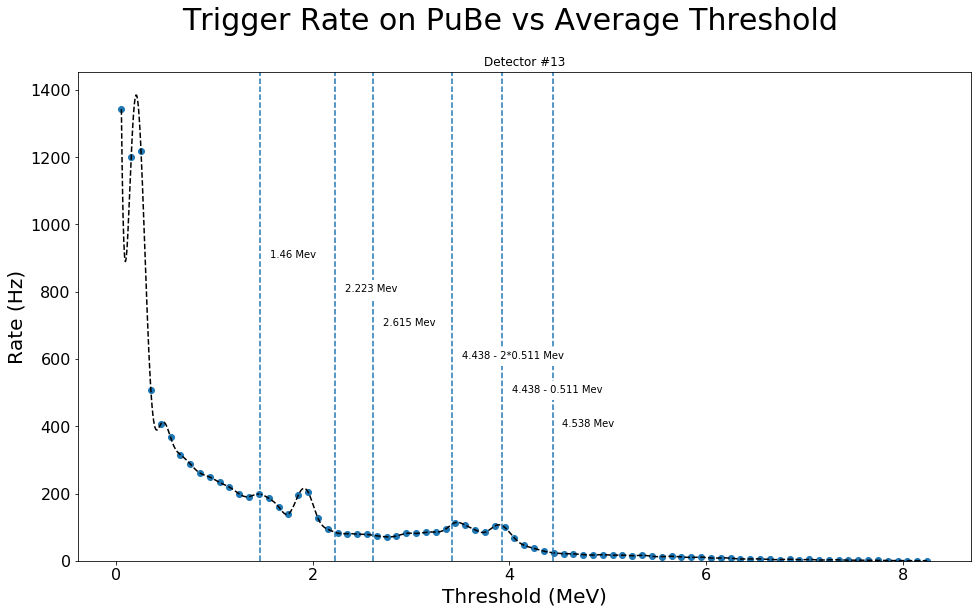

In [18]:
detnum = 13

plt.figure(figsize=(16,9))

interpolated = interp(thresh,ranges[detnum],k=5)
interpolatey = interpolated(fine)

plt.plot(fine,interpolatey,linestyle='--',color='k')
plt.scatter(thresh,ranges[detnum],label='det{:02d}'.format(detnum),marker='o')

plt.xlabel("Threshold (MeV)",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.suptitle("Trigger Rate on PuBe vs Average Threshold",size=30)
plt.title("Detector #{:02d}".format(detnum))
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels

#plt.xlim(1000)
plt.ylim(0)

plt.axvline(1.46,linestyle='--')
plt.text(1.56,900,"1.46 Mev",backgroundcolor='w')
plt.axvline(2.223,linestyle='--')
plt.text(2.323,800,"2.223 Mev",backgroundcolor='w')
plt.axvline(2.615,linestyle='--')
plt.text(2.715,700,"2.615 Mev",backgroundcolor='w')
plt.axvline(4.438-2*0.511,linestyle='--')
plt.text(4.538-2*0.511,600,"4.438 - 2*0.511 Mev",backgroundcolor='w')
plt.axvline(4.438-0.511,linestyle='--')
plt.text(4.538-0.511,500,"4.438 - 0.511 Mev",backgroundcolor='w')
plt.axvline(4.438,linestyle='--')
plt.text(4.538,400,"4.538 Mev",backgroundcolor='w')

plt.show()

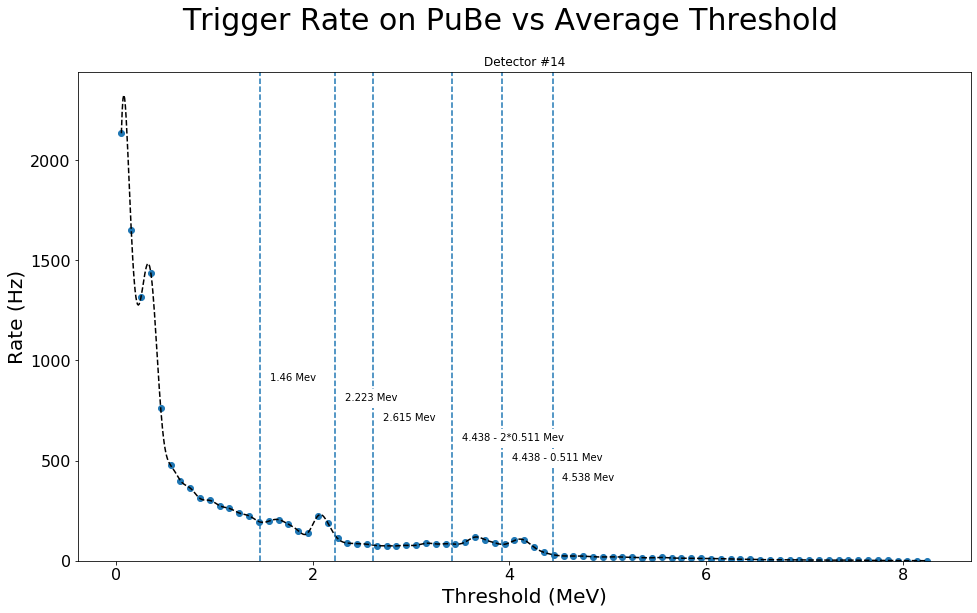

In [19]:
detnum = 14

plt.figure(figsize=(16,9))

interpolated = interp(thresh,ranges[detnum],k=5)
interpolatey = interpolated(fine)

plt.plot(fine,interpolatey,linestyle='--',color='k')
plt.scatter(thresh,ranges[detnum],label='det{:02d}'.format(detnum),marker='o')

plt.xlabel("Threshold (MeV)",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.suptitle("Trigger Rate on PuBe vs Average Threshold",size=30)
plt.title("Detector #{:02d}".format(detnum))
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels

#plt.xlim(1000)
plt.ylim(0)

plt.axvline(1.46,linestyle='--')
plt.text(1.56,900,"1.46 Mev",backgroundcolor='w')
plt.axvline(2.223,linestyle='--')
plt.text(2.323,800,"2.223 Mev",backgroundcolor='w')
plt.axvline(2.615,linestyle='--')
plt.text(2.715,700,"2.615 Mev",backgroundcolor='w')
plt.axvline(4.438-2*0.511,linestyle='--')
plt.text(4.538-2*0.511,600,"4.438 - 2*0.511 Mev",backgroundcolor='w')
plt.axvline(4.438-0.511,linestyle='--')
plt.text(4.538-0.511,500,"4.438 - 0.511 Mev",backgroundcolor='w')
plt.axvline(4.438,linestyle='--')
plt.text(4.538,400,"4.538 Mev",backgroundcolor='w')

plt.show()

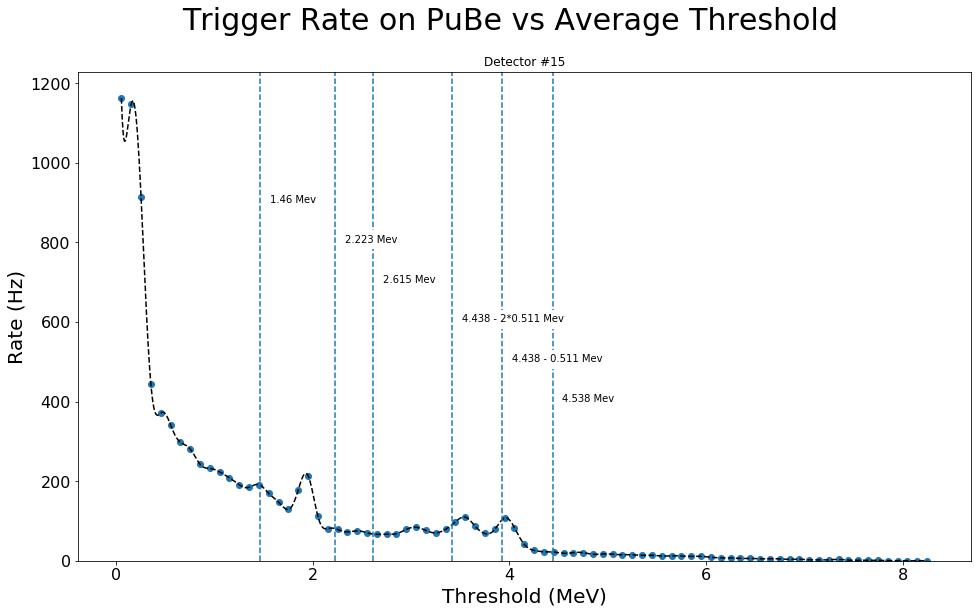

In [20]:
detnum = 15

plt.figure(figsize=(16,9))

interpolated = interp(thresh,ranges[detnum],k=5)
interpolatey = interpolated(fine)

plt.plot(fine,interpolatey,linestyle='--',color='k')
plt.scatter(thresh,ranges[detnum],label='det{:02d}'.format(detnum),marker='o')

plt.xlabel("Threshold (MeV)",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.suptitle("Trigger Rate on PuBe vs Average Threshold",size=30)
plt.title("Detector #{:02d}".format(detnum))
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels

#plt.xlim(1000)
plt.ylim(0)

plt.axvline(1.46,linestyle='--')
plt.text(1.56,900,"1.46 Mev",backgroundcolor='w')
plt.axvline(2.223,linestyle='--')
plt.text(2.323,800,"2.223 Mev",backgroundcolor='w')
plt.axvline(2.615,linestyle='--')
plt.text(2.715,700,"2.615 Mev",backgroundcolor='w')
plt.axvline(4.438-2*0.511,linestyle='--')
plt.text(4.538-2*0.511,600,"4.438 - 2*0.511 Mev",backgroundcolor='w')
plt.axvline(4.438-0.511,linestyle='--')
plt.text(4.538-0.511,500,"4.438 - 0.511 Mev",backgroundcolor='w')
plt.axvline(4.438,linestyle='--')
plt.text(4.538,400,"4.538 Mev",backgroundcolor='w')

plt.show()

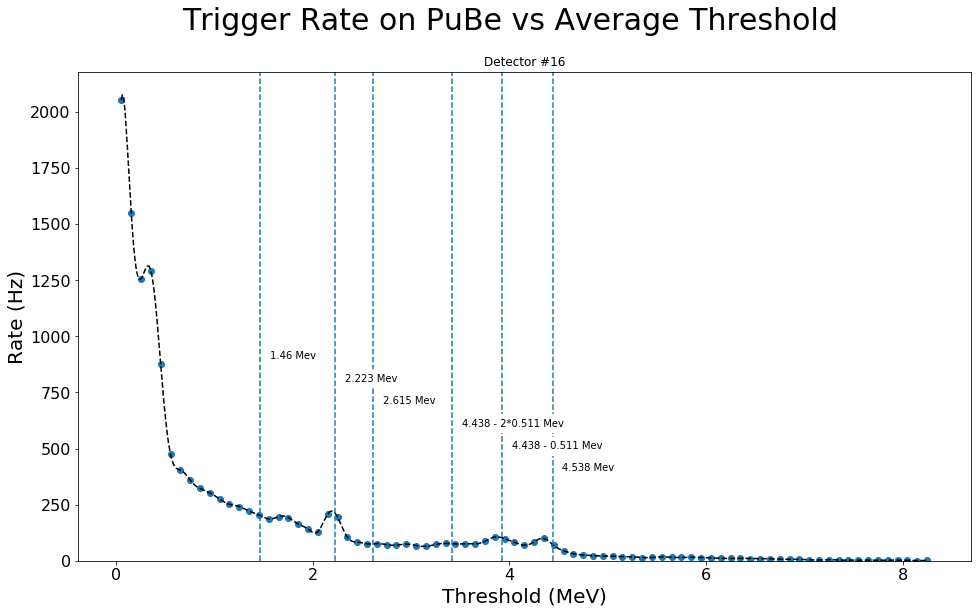

In [21]:
detnum = 16

plt.figure(figsize=(16,9))

interpolated = interp(thresh,ranges[detnum],k=5)
interpolatey = interpolated(fine)

plt.plot(fine,interpolatey,linestyle='--',color='k')
plt.scatter(thresh,ranges[detnum],label='det{:02d}'.format(detnum),marker='o')

plt.xlabel("Threshold (MeV)",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.suptitle("Trigger Rate on PuBe vs Average Threshold",size=30)
plt.title("Detector #{:02d}".format(detnum))
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels

#plt.xlim(1000)
plt.ylim(0)

plt.axvline(1.46,linestyle='--')
plt.text(1.56,900,"1.46 Mev",backgroundcolor='w')
plt.axvline(2.223,linestyle='--')
plt.text(2.323,800,"2.223 Mev",backgroundcolor='w')
plt.axvline(2.615,linestyle='--')
plt.text(2.715,700,"2.615 Mev",backgroundcolor='w')
plt.axvline(4.438-2*0.511,linestyle='--')
plt.text(4.538-2*0.511,600,"4.438 - 2*0.511 Mev",backgroundcolor='w')
plt.axvline(4.438-0.511,linestyle='--')
plt.text(4.538-0.511,500,"4.438 - 0.511 Mev",backgroundcolor='w')
plt.axvline(4.438,linestyle='--')
plt.text(4.538,400,"4.538 Mev",backgroundcolor='w')

plt.show()

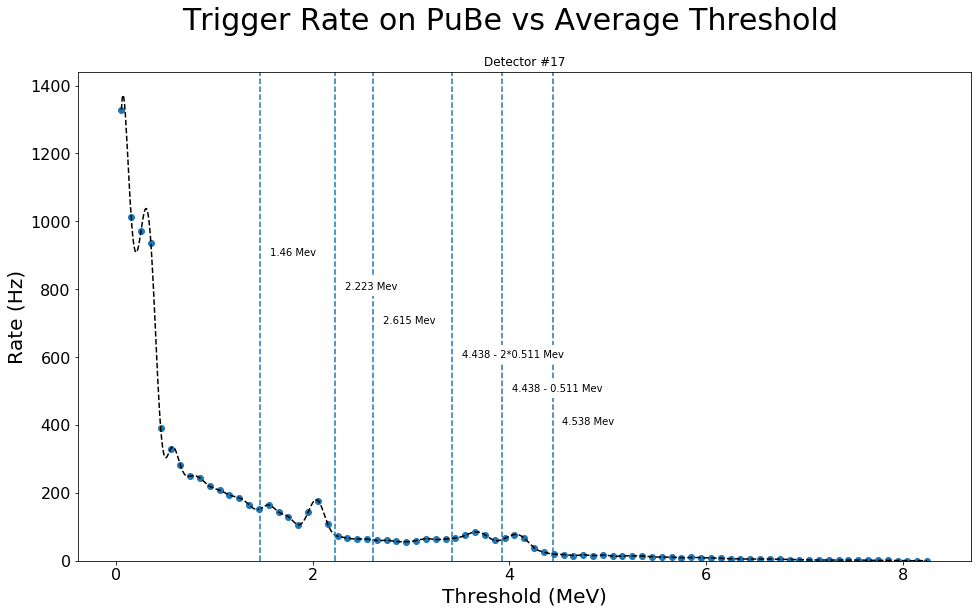

In [22]:
detnum = 17

plt.figure(figsize=(16,9))

interpolated = interp(thresh,ranges[detnum],k=5)
interpolatey = interpolated(fine)

plt.plot(fine,interpolatey,linestyle='--',color='k')
plt.scatter(thresh,ranges[detnum],label='det{:02d}'.format(detnum),marker='o')

plt.xlabel("Threshold (MeV)",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.suptitle("Trigger Rate on PuBe vs Average Threshold",size=30)
plt.title("Detector #{:02d}".format(detnum))
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels

#plt.xlim(1000)
plt.ylim(0)

plt.axvline(1.46,linestyle='--')
plt.text(1.56,900,"1.46 Mev",backgroundcolor='w')
plt.axvline(2.223,linestyle='--')
plt.text(2.323,800,"2.223 Mev",backgroundcolor='w')
plt.axvline(2.615,linestyle='--')
plt.text(2.715,700,"2.615 Mev",backgroundcolor='w')
plt.axvline(4.438-2*0.511,linestyle='--')
plt.text(4.538-2*0.511,600,"4.438 - 2*0.511 Mev",backgroundcolor='w')
plt.axvline(4.438-0.511,linestyle='--')
plt.text(4.538-0.511,500,"4.438 - 0.511 Mev",backgroundcolor='w')
plt.axvline(4.438,linestyle='--')
plt.text(4.538,400,"4.538 Mev",backgroundcolor='w')

plt.show()

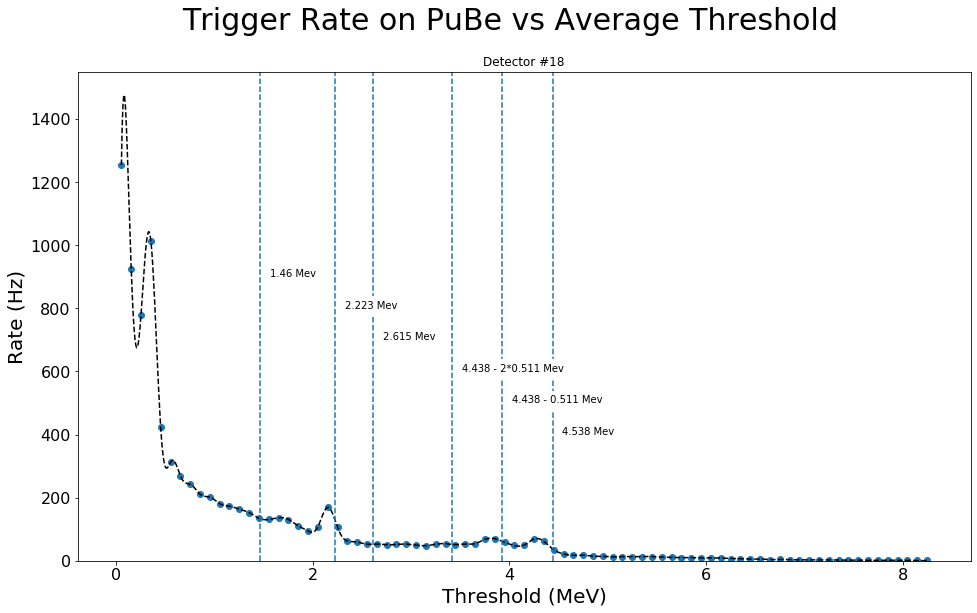

In [23]:
detnum = 18

plt.figure(figsize=(16,9))

interpolated = interp(thresh,ranges[detnum],k=5)
interpolatey = interpolated(fine)

plt.plot(fine,interpolatey,linestyle='--',color='k')
plt.scatter(thresh,ranges[detnum],label='det{:02d}'.format(detnum),marker='o')

plt.xlabel("Threshold (MeV)",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.suptitle("Trigger Rate on PuBe vs Average Threshold",size=30)
plt.title("Detector #{:02d}".format(detnum))
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels

#plt.xlim(1000)
plt.ylim(0)

plt.axvline(1.46,linestyle='--')
plt.text(1.56,900,"1.46 Mev",backgroundcolor='w')
plt.axvline(2.223,linestyle='--')
plt.text(2.323,800,"2.223 Mev",backgroundcolor='w')
plt.axvline(2.615,linestyle='--')
plt.text(2.715,700,"2.615 Mev",backgroundcolor='w')
plt.axvline(4.438-2*0.511,linestyle='--')
plt.text(4.538-2*0.511,600,"4.438 - 2*0.511 Mev",backgroundcolor='w')
plt.axvline(4.438-0.511,linestyle='--')
plt.text(4.538-0.511,500,"4.438 - 0.511 Mev",backgroundcolor='w')
plt.axvline(4.438,linestyle='--')
plt.text(4.538,400,"4.538 Mev",backgroundcolor='w')

plt.show()

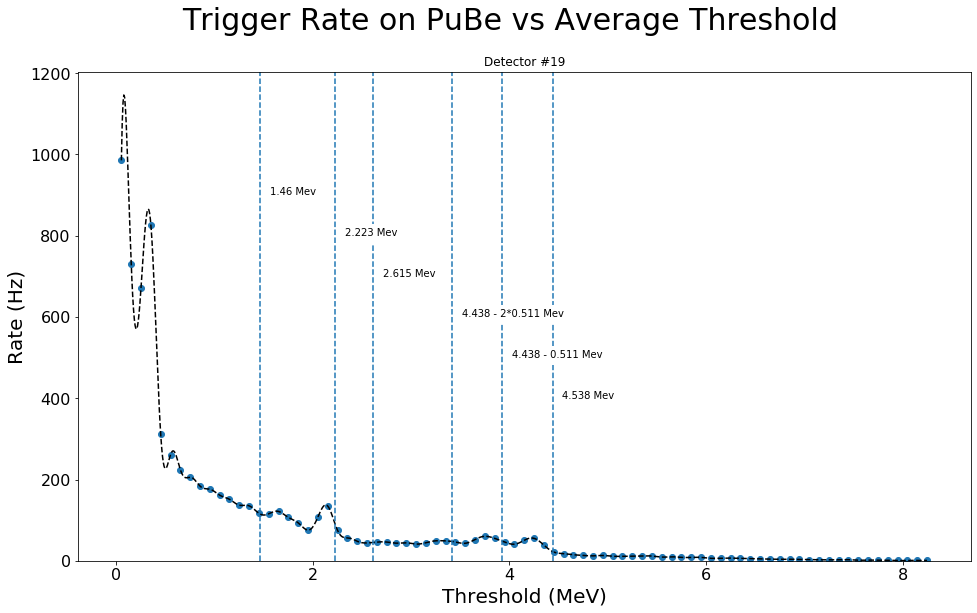

In [24]:
detnum = 19

plt.figure(figsize=(16,9))

interpolated = interp(thresh,ranges[detnum],k=5)
interpolatey = interpolated(fine)

plt.plot(fine,interpolatey,linestyle='--',color='k')
plt.scatter(thresh,ranges[detnum],label='det{:02d}'.format(detnum),marker='o')

plt.xlabel("Threshold (MeV)",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.suptitle("Trigger Rate on PuBe vs Average Threshold",size=30)
plt.title("Detector #{:02d}".format(detnum))
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels

#plt.xlim(1000)
plt.ylim(0)

plt.axvline(1.46,linestyle='--')
plt.text(1.56,900,"1.46 Mev",backgroundcolor='w')
plt.axvline(2.223,linestyle='--')
plt.text(2.323,800,"2.223 Mev",backgroundcolor='w')
plt.axvline(2.615,linestyle='--')
plt.text(2.715,700,"2.615 Mev",backgroundcolor='w')
plt.axvline(4.438-2*0.511,linestyle='--')
plt.text(4.538-2*0.511,600,"4.438 - 2*0.511 Mev",backgroundcolor='w')
plt.axvline(4.438-0.511,linestyle='--')
plt.text(4.538-0.511,500,"4.438 - 0.511 Mev",backgroundcolor='w')
plt.axvline(4.438,linestyle='--')
plt.text(4.538,400,"4.538 Mev",backgroundcolor='w')

plt.show()

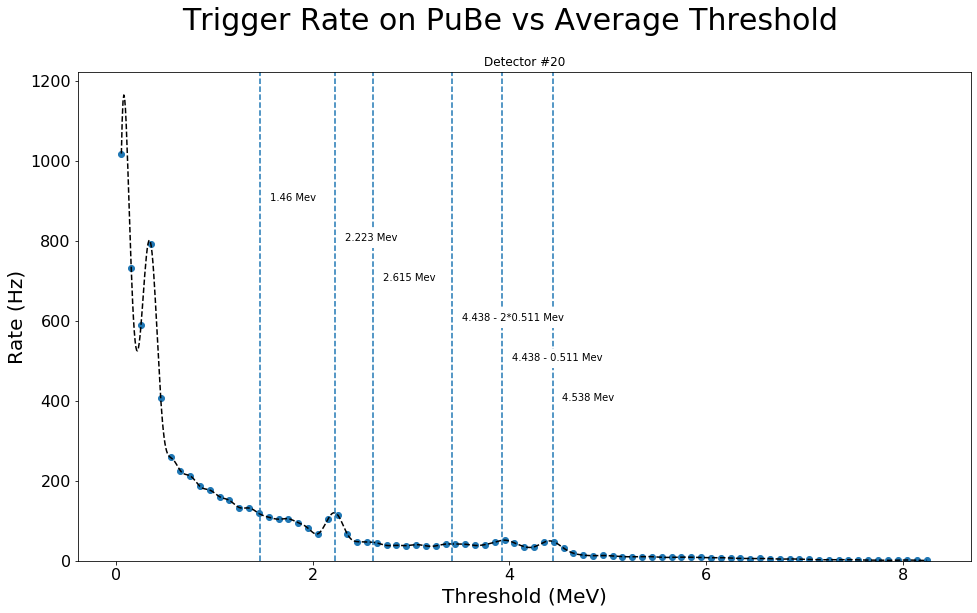

In [25]:
detnum = 20

plt.figure(figsize=(16,9))

interpolated = interp(thresh,ranges[detnum],k=5)
interpolatey = interpolated(fine)

plt.plot(fine,interpolatey,linestyle='--',color='k')
plt.scatter(thresh,ranges[detnum],label='det{:02d}'.format(detnum),marker='o')

plt.xlabel("Threshold (MeV)",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.suptitle("Trigger Rate on PuBe vs Average Threshold",size=30)
plt.title("Detector #{:02d}".format(detnum))
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels

#plt.xlim(1000)
plt.ylim(0)

plt.axvline(1.46,linestyle='--')
plt.text(1.56,900,"1.46 Mev",backgroundcolor='w')
plt.axvline(2.223,linestyle='--')
plt.text(2.323,800,"2.223 Mev",backgroundcolor='w')
plt.axvline(2.615,linestyle='--')
plt.text(2.715,700,"2.615 Mev",backgroundcolor='w')
plt.axvline(4.438-2*0.511,linestyle='--')
plt.text(4.538-2*0.511,600,"4.438 - 2*0.511 Mev",backgroundcolor='w')
plt.axvline(4.438-0.511,linestyle='--')
plt.text(4.538-0.511,500,"4.438 - 0.511 Mev",backgroundcolor='w')
plt.axvline(4.438,linestyle='--')
plt.text(4.538,400,"4.538 Mev",backgroundcolor='w')

plt.show()

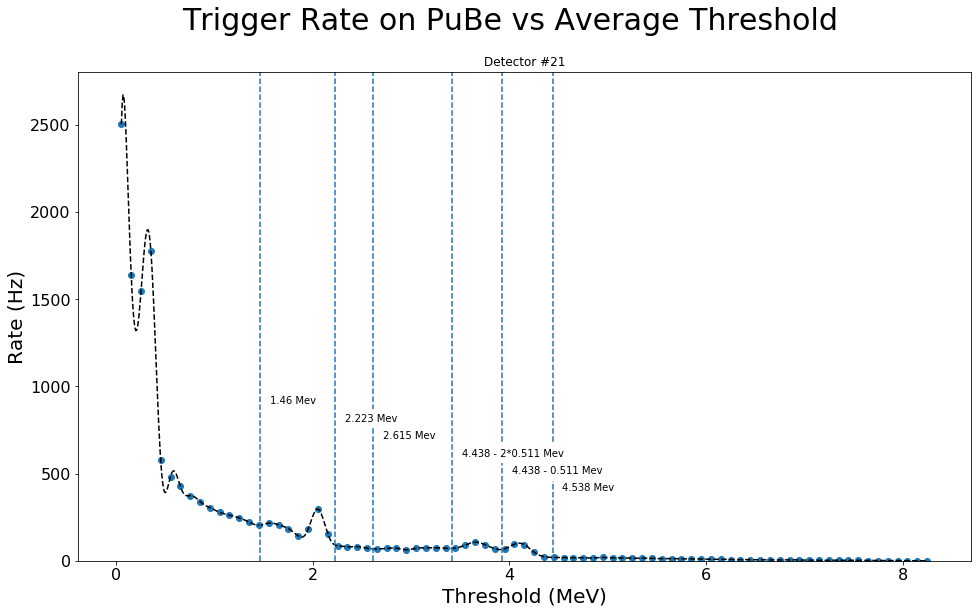

In [26]:
detnum = 21

plt.figure(figsize=(16,9))

interpolated = interp(thresh,ranges[detnum],k=5)
interpolatey = interpolated(fine)

plt.plot(fine,interpolatey,linestyle='--',color='k')
plt.scatter(thresh,ranges[detnum],label='det{:02d}'.format(detnum),marker='o')

plt.xlabel("Threshold (MeV)",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.suptitle("Trigger Rate on PuBe vs Average Threshold",size=30)
plt.title("Detector #{:02d}".format(detnum))
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels

#plt.xlim(1000)
plt.ylim(0)

plt.axvline(1.46,linestyle='--')
plt.text(1.56,900,"1.46 Mev",backgroundcolor='w')
plt.axvline(2.223,linestyle='--')
plt.text(2.323,800,"2.223 Mev",backgroundcolor='w')
plt.axvline(2.615,linestyle='--')
plt.text(2.715,700,"2.615 Mev",backgroundcolor='w')
plt.axvline(4.438-2*0.511,linestyle='--')
plt.text(4.538-2*0.511,600,"4.438 - 2*0.511 Mev",backgroundcolor='w')
plt.axvline(4.438-0.511,linestyle='--')
plt.text(4.538-0.511,500,"4.438 - 0.511 Mev",backgroundcolor='w')
plt.axvline(4.438,linestyle='--')
plt.text(4.538,400,"4.538 Mev",backgroundcolor='w')

plt.show()

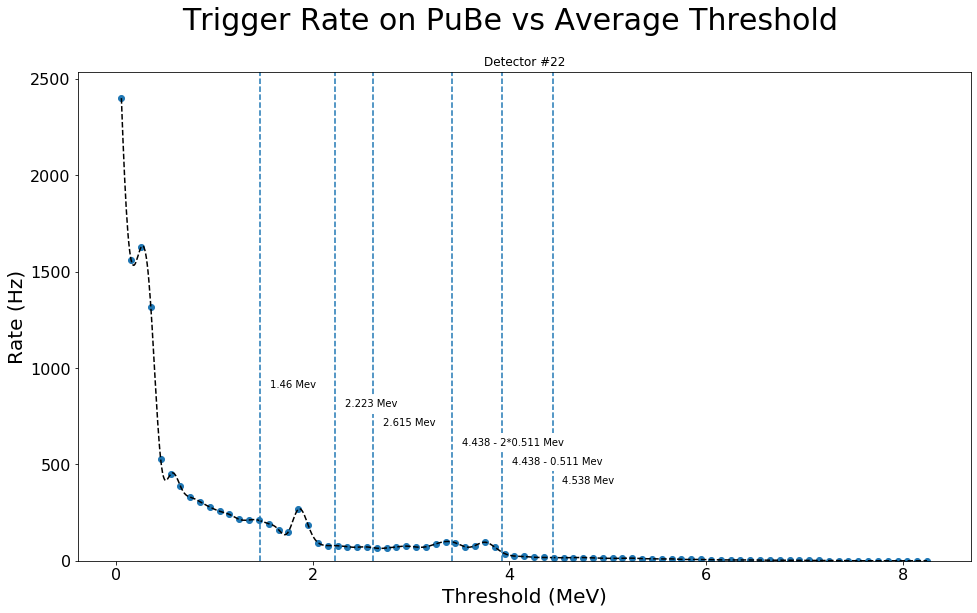

In [27]:
detnum = 22

plt.figure(figsize=(16,9))

interpolated = interp(thresh,ranges[detnum],k=5)
interpolatey = interpolated(fine)

plt.plot(fine,interpolatey,linestyle='--',color='k')
plt.scatter(thresh,ranges[detnum],label='det{:02d}'.format(detnum),marker='o')

plt.xlabel("Threshold (MeV)",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.suptitle("Trigger Rate on PuBe vs Average Threshold",size=30)
plt.title("Detector #{:02d}".format(detnum))
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels

#plt.xlim(1000)
plt.ylim(0)

plt.axvline(1.46,linestyle='--')
plt.text(1.56,900,"1.46 Mev",backgroundcolor='w')
plt.axvline(2.223,linestyle='--')
plt.text(2.323,800,"2.223 Mev",backgroundcolor='w')
plt.axvline(2.615,linestyle='--')
plt.text(2.715,700,"2.615 Mev",backgroundcolor='w')
plt.axvline(4.438-2*0.511,linestyle='--')
plt.text(4.538-2*0.511,600,"4.438 - 2*0.511 Mev",backgroundcolor='w')
plt.axvline(4.438-0.511,linestyle='--')
plt.text(4.538-0.511,500,"4.438 - 0.511 Mev",backgroundcolor='w')
plt.axvline(4.438,linestyle='--')
plt.text(4.538,400,"4.538 Mev",backgroundcolor='w')

plt.show()

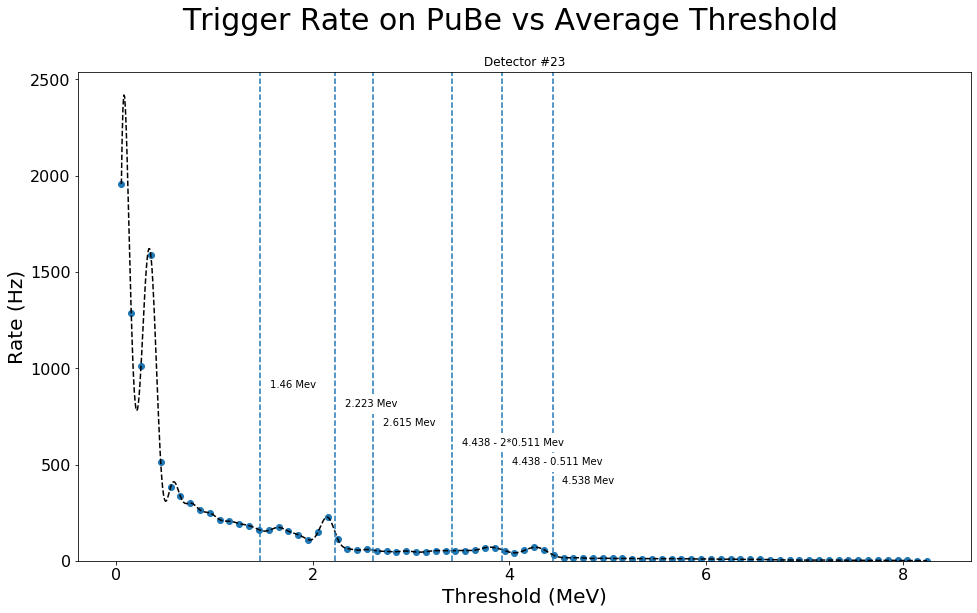

In [28]:
detnum = 23

plt.figure(figsize=(16,9))

interpolated = interp(thresh,ranges[detnum],k=5)
interpolatey = interpolated(fine)

plt.plot(fine,interpolatey,linestyle='--',color='k')
plt.scatter(thresh,ranges[detnum],label='det{:02d}'.format(detnum),marker='o')

plt.xlabel("Threshold (MeV)",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.suptitle("Trigger Rate on PuBe vs Average Threshold",size=30)
plt.title("Detector #{:02d}".format(detnum))
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels

#plt.xlim(1000)
plt.ylim(0)

plt.axvline(1.46,linestyle='--')
plt.text(1.56,900,"1.46 Mev",backgroundcolor='w')
plt.axvline(2.223,linestyle='--')
plt.text(2.323,800,"2.223 Mev",backgroundcolor='w')
plt.axvline(2.615,linestyle='--')
plt.text(2.715,700,"2.615 Mev",backgroundcolor='w')
plt.axvline(4.438-2*0.511,linestyle='--')
plt.text(4.538-2*0.511,600,"4.438 - 2*0.511 Mev",backgroundcolor='w')
plt.axvline(4.438-0.511,linestyle='--')
plt.text(4.538-0.511,500,"4.438 - 0.511 Mev",backgroundcolor='w')
plt.axvline(4.438,linestyle='--')
plt.text(4.538,400,"4.538 Mev",backgroundcolor='w')

plt.show()